In [1]:
import numpy as np

In [21]:
class SLotMachine:
    def __init__(self,realMean,up_lim):
        self.realMean=realMean;
        self.mean=up_lim;
        self.N=0;
    
    def pullHandle(self):
        return np.random.randn()+self.realMean;
    
    def updateMean(self,x):
        self.N+=1;
        self.mean=((1-1.0/self.N)*self.mean) +((1.0/self.N)*x)
        

In [24]:
import matplotlib.pyplot as plt
def run_experiment(m1,m2,m3,N,up=10):
    sLotMachines =[SLotMachine(m1,up),SLotMachine(m2,up),SLotMachine(m3,up)];
    data=np.empty(N);
    for i in range(N):
        j=np.argmax([b.mean for b in sLotMachines]);
        x=sLotMachines[j].pullHandle();
        sLotMachines[j].updateMean(x);
        data[i]=x;
    cum_avg=np.cumsum(data)/(np.arange(N)+1);
    plt.plot(cum_avg)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in sLotMachines:
        print(b.mean)

    return cum_avg

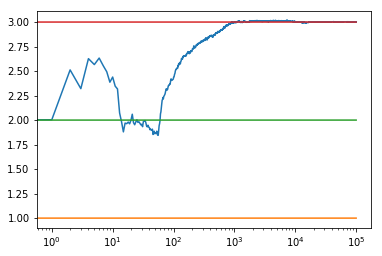

1.338173577794605
1.8533900834989565
3.0019246480126056


In [25]:
oiv = run_experiment(1.0, 2.0, 3.0, 100000)

In [37]:
class SLotMachineZ:
    def __init__(self,realMean):
        self.realMean=realMean;
        self.mean=0;
        self.N=0;
    
    def pullHandle(self):
        return np.random.randn()+self.realMean;
    
    def updateMean(self,x):
        self.N+=1;
        self.mean=((1-1.0/self.N)*self.mean) +((1.0/self.N)*x)

In [38]:
import matplotlib.pyplot as plt
def run_experiment_eps(m1,m2,m3,eps,N):
    sLotMachines =[SLotMachineZ(m1),SLotMachineZ(m2),SLotMachineZ(m3)];
    data=np.empty(N);
    for i in range(N):
        p =np.random.random();
        if p<eps:
            j=np.random.choice(3);
        else:
            j=np.argmax([b.mean for b in sLotMachines]);
        x=sLotMachines[j].pullHandle();
        sLotMachines[j].updateMean(x);
        data[i]=x;
    cum_avg=np.cumsum(data)/(np.arange(N)+1);
    plt.plot(cum_avg)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in sLotMachines:
        print(b.mean)

    return cum_avg

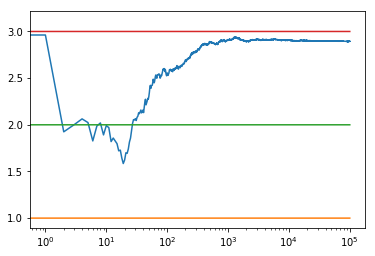

0.9760690425218834
1.9789644786627167
2.9962866061974123


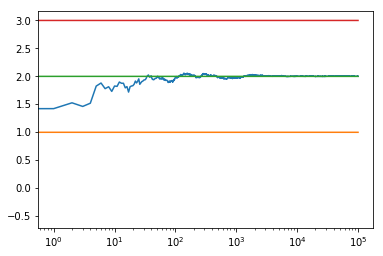

-0.5344903519547439
2.0023771340119176
1.7350049445238869


In [39]:
c_1 = run_experiment_eps(1.0, 2.0, 3.0, 0.1, 100000)
oiv = run_experiment(1.0, 2.0, 3.0, 100000)